In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train_data = pd.read_csv('train (1).csv')
test_data = pd.read_csv('test (1).csv')
gender_submission = pd.read_csv('gender_submission (1).csv')

In [11]:
#Display the first few rows of the train dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
#Display data type information and non-null counts
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
#Get Summary Statistics for Numerical columns
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
#Check for missing values in the train dataset
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
#Summary missing values in each column
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

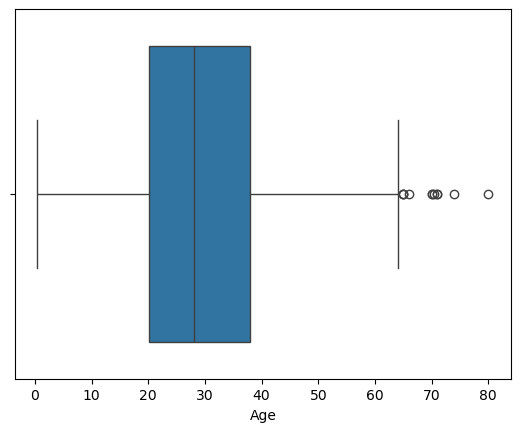

In [21]:
#Create a box plot to visualize ptential outliers
sns.boxplot(x=train_data['Age'])
plt.show()

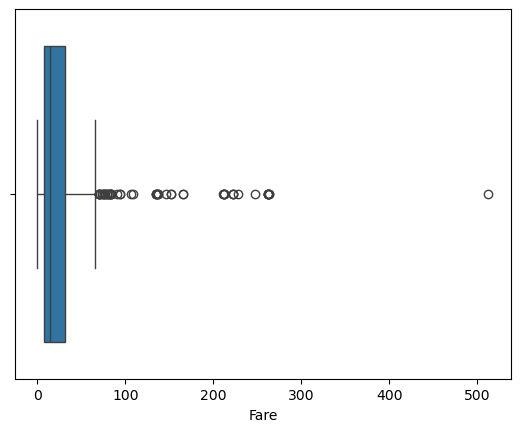

In [23]:
#Create a box plot to visualize potential outliers
sns.boxplot(x=test_data['Fare'])
plt.show()

In [31]:
#Replac missing values in a Age with the mean of that column
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

In [39]:
#Replace missing values in a Fare with the mean of that columns
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())                      

In [41]:
#Replace has alot of missing values so lets remove the null values from Cabin
train_data.drop(columns=['Cabin'],inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

In [47]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [53]:
#Embarked is a Catergorical variable, we will replace any missing values
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

In [57]:
outliers=[]
def detect_outliers(data):

    threshold=3
    mean = np.mean(data)
    std =np.std(data)

    for i in data:
        z_score= (1 - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append()
    return outliers

In [59]:
from scipy import stats

#Calculate the Z-score for a column
z_scores = stats.zscore(train_data['Age'])

#Identify outliers based on a Z-Score threshold(e.g. 3)
outliers_indices = (z_scores >3) | (z_scores < -3)

In [63]:
cleaned_titanic_df = train_data[-outliers_indices]

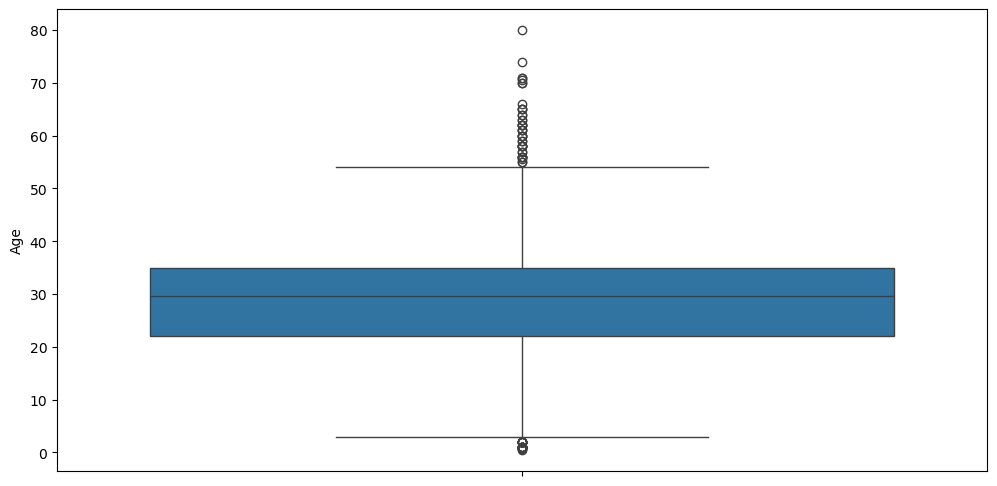

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_data['Age'])
plt.xticks(rotation=45)
plt.show()